# Lab 3 - Genome Assembly
## Graph Algorithms
Material and embedded lab.

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

['../tests/answers_Lab3.joblib']

# History and motivation

## Why do we sequence different species?

<table>
    <tr>
                <td><img src="https://www.akcchf.org/assets/images/Dog-Genome-Nature.jpg"></td>
                <td><img src="http://www.scienceagainstevolution.org/images/v10i1g1.jpg" width=300></td>
                <td><img src="https://www.ncbi.nlm.nih.gov/genome/guide/bee/cover_nature.jpg"></td>
    </tr>
    </table>
Many applications in medicine, agriculture, biotechnology, etc begin with a sequenced and annotated genome.

## Brief History of Genome Sequencing
* 1977 - Walter Gilbert and Frederick Sanger develop independent DNA sequencing methods.
* 1980 - They share the Nobel Prize.
* Sequencing methods were too expensive ($3 billion to sequence the human genome)

## The Race to Sequence the Human Genome
* 1990 - The public Human Genome Project, headed by Francis Collins, aims to sequence the human genome by 2005.
* 1997 - Craig Venter founds Celera Genomics, a private firm with the same goal :)
* Genome become available 5 years early in 2000

<img src="https://thumbs-prod.si-cdn.com/CZYSL1uFzN85JMfOk1XBKFSA9uI=/fit-in/1600x0/https://public-media.si-cdn.com/filer/f5/45/f545637b-13e4-42a8-927b-a1f59d326e0b/biogenome.jpg">

# Exploding Newspapers

## Consider a silly example
<img src="http://bioinformaticsalgorithms.com/images/Assembly/newspaper_blowup.png">

"Imagine that we stack a hundred copies of the June 27, 2000 edition of the New York Times on a pile of dynamite, and then we light the fuse. We ask you to further suspend your disbelief and assume that the newspapers are not all incinerated but instead explode cartoonishly into smoldering pieces of confetti. How could we use the tiny snippets of newspaper to figure out what the news was on June 27, 2000? We will call this crazy conundrum the Newspaper Problem." - Bioinformatics Chapter 3

<img src="http://bioinformaticsalgorithms.com/images/Assembly/overlapping_newspaper.png" width=400>

Use overlapping shreds of paper to figure out the news.

"Fine, you ask, but what do exploding newspapers have to do with biology? Determining the order of nucleotides in a genome, or genome sequencing, presents a fundamental task in bioinformatics. Genomes vary in length; your own genome is roughly 3 billion nucleotides long, whereas the genome of Amoeba dubia, an amorphous unicellular organism, is approximately 200 times longer! This unicellular organism competes with the rare Japanese flower Paris japonica for the title of species with the longest genome." - Bioinformatics Algorithms, Chapter 3.

## Traditional Method for Genome Sequencing

<img src="http://bioinformaticsalgorithms.com/images/Assembly/sequencing_overview.png">

## What makes genome sequencing difficult?
* Modern sequencing machines cannot read an entire genome one nucleotide at a time from beginning to end (like we read a book)
* They can only shred the genome and generate short  reads (though we can now mix longer reads with these shorter reads)
* The genome assembly is not the same as a jigsaw puzzle: we must use overlapping reads to reconstruct the genome, a  giant overlap puzzle!

## Into the language of computer scientists: String Reconstruction Problem

**Exercise 1** String composition problem: Generate the k-mer composition of a string.
    
Input: An integer $k$ and a string $text$.

Output: The lexicographic ordered collection of all k-mer substrings in text (including repeated k-mers) ``composition(k,text)``, where the k-mers are arranged in lexicographic order.

Example: ``composition(3,TATGGGGTGC)`` => [ATG, GGG, GGG, GGT, GTG, TAT, TGC, TGG]. Notice how there are two entries for GGG, so we keep duplicates.

Learning objective: Build up the skills and vocabulary we need to solve the reconstruction problem.

In [111]:
def composition(k,text):
    '''Generate the k-mer composition of a string.'''
    patterns = []
    for i in range(len(text)-k+1):
        patterns.append(text[i:i+k])
    patterns.sort()
    return patterns

composition(3,"TATGGGGTGC")

['ATG', 'GGG', 'GGG', 'GGT', 'GTG', 'TAT', 'TGC', 'TGG']

Well that's great and pretty straightfoward, but we need to solve the inverse problem...

String Reconstruction Problem: Reconstruct a string from its k-mer composition.

Input: An integer $k$ and a collection ``patterns`` of $k$-mers

Output: A string ``text`` with $k$-mer composition equal to ``patterns`` if such a string exists.

### Easy string reconstruction problem first
Consider ``patterns`` = [AAT ATG GTT TAA TGT]

Most straightfoward way to solve this is to "connect" a pair of $k$-mers if they overlap in $k$-1 symbols. Where should we start? Let's start with ``TAA`` because there is no 3-mer ending in ``TA``. The next $k$-mer has to be ``AAT`` because it is the only one that satisfies. We can continue with this pattern easily for this example:
<pre>
TAA    
 AAT   
  ATG  
   TGT 
    GTT
TAATGTT
</pre>
Nice! We did it, so time to move on to another chapter...

### A harder string reconstruction problem

AAT  ATG  ATG  ATG  CAT  CCA  GAT  GCC  GGA  GGG  GTT  TAA  TGC  TGG  TGT

Let's start with ``TAA`` again:
<pre>
TAA  
 AAT 
  ATG
</pre>
So far so good! Let's try to continue. ``ATG`` can be extended by either ``TGC`` or ``TGG`` or ``TGT``. How do we choose? In other words, how good are you at chess because we need to be able to look ahead. For now, let's choose ``TGT``.

After we choose ``TGT`` our only choose is ``GTT`` so we get:
<pre>
TAA   
 AAT  
  ATG 
   TGT
    GTT
</pre>
But we are now stuck! There is nothing that matches :(

If you are good at looking ahead you could have extended ``ATG`` by ``TGC`` instead.


If we make that change, then we obtain the following assembly:
<pre>
TAA             
 AAT            
  ATG           
   TGC          
    GCC         
     CCA        
      CAT       
       ATG      
        TGG     
         GGA    
          GAT   
           ATG  
            TGT 
             GTT
TAATGCCATGGATGTT
</pre>

## So what was the problem?
Repeats complicate genome assembly!

Our previous problem came from the fact that ``ATG`` is repeated three times which causes us to have the three choices by which to extend ``ATG``. This doesn't pose too much of a problem for small examples, but consider having this happen when we have millions of reads!

## String Reconstruction: A reverse approach/order from the book
The book builds up from walking overlap graphs to an *Algorithm for Finding Eulerian Cycles* (wait what are those words!).

We are going to work our way backwards because it is a good thing to have different complementary approaches. Please please read the book and listen to the textbook online lectures.

Our big goal is the following...

**Solve the string reconstruction problem** using the algorithm for finding Eulerian Cycles. Our approach is as follows:
<pre>
def string_reconstruction(patterns):
    dB = de_bruijn(patterns)
    path = eulerian_path(dB)
    text = path_to_genome(path)
    return text
</pre>

## Constructing de Bruijn graphs from $k$-mer composition
Given a collection of $k$-mers Patterns, the nodes of de_bruijn(k,patterns) are simply all unique (k−1)-mers occurring as a prefix or suffix in Patterns. For example, say we are given the following collection of 3-mers:
<pre>
AAT   ATG   ATG   ATG    CAT   CCA   GAT   GCC   GGA   GGG   GTT   TAA   TGC   TGG   TGT
</pre>
Then the set of eleven unique 2-mers is:
<pre>
AA   AT   CA   CC   GA   GC   GG   GT   TA   TG   TT
</pre>

For every $k$-mer in ``patterns`` we will connect its prefix node to its suffix node by a directed edge in order to produce our final graph.

<img src="http://bioinformaticsalgorithms.com/images/Assembly/debruijn_graph_alternate_rendering.png">

**Exercise 2** Construct the de Bruijn graph from a set of k-mers.

Input: a collection of $k$-mers ``patterns``.

Output: NetworkX directed graph that corresponds to the adjacency list of the de Bruijn graph. 

Now that you know how to use ``networkx``... use it to make your life easier for representing your graph.

In [65]:
# Just code to help you out here
%matplotlib inline

import networkx as nx
import pandas as pd
import copy
from collections import Counter

def to_adj(T):
    '''Makes adjacency matrix for a graph using a pandas DataFrame.'''
    return pd.DataFrame(nx.adjacency_matrix(T).todense(),index=T.nodes(),columns=T.nodes())

def show(T):
    T = copy.deepcopy(T)
    width_dict = Counter(T.edges())
    edge_width = [ (u, v, {'width': value}) 
                  for ((u, v), value) in width_dict.items()]
    
    G_new = nx.DiGraph()
    G_new.add_edges_from(edge_width)
    pos=nx.kamada_kawai_layout(G_new)
    #pos=nx.spring_layout(G_new)
    nx.draw(G_new, pos)
    edge_labels=dict([((u,v,),d['width'])
                 for u,v,d in G_new.edges(data=True)])
    
    nx.draw(G_new,pos,with_labels=True)
    nx.draw_networkx_edges(G_new, pos=pos)
    nx.draw_networkx_edge_labels(G_new, pos, edge_labels=edge_labels,
                                 label_pos=0.55, font_size=10)

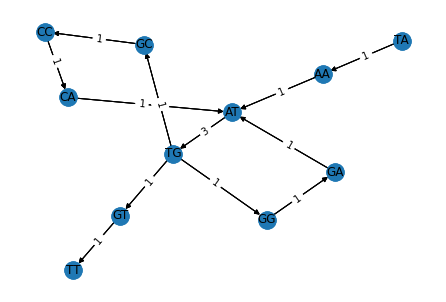

In [66]:
def de_bruijn(patterns):
    '''Constructs the de Bruijn graph from a set of k-mers.'''
    dB = nx.MultiDiGraph()
    for i in patterns:
        prefix = i[:-1]
        suffix = i[1:]
        dB.add_edge(prefix,suffix)
    return dB

dB = de_bruijn(["AAT","ATG","ATG","ATG","CAT","CCA","GAT","GCC","GGA","GGG","GTT","TAA","TGC","TGG","TGT"])
show(dB)

In [67]:
to_adj(dB)

,AA,AT,TG,CA,CC,GA,GC,GG,GT,TT,TA
AA,0,1,0,0,0,0,0,0,0,0,0
AT,0,0,3,0,0,0,0,0,0,0,0
TG,0,0,0,0,0,0,1,1,1,0,0
CA,0,1,0,0,0,0,0,0,0,0,0
CC,0,0,0,1,0,0,0,0,0,0,0
GA,0,1,0,0,0,0,0,0,0,0,0
GC,0,0,0,0,1,0,0,0,0,0,0
GG,0,0,0,0,0,1,0,1,0,0,0
GT,0,0,0,0,0,0,0,0,0,1,0
TT,0,0,0,0,0,0,0,0,0,0,0


We now have step 1 completed. The next step is to find the Eulerian path, but we will start by talking about and finding Eulerian cycles. More undefined words! Don't forget. For a different bottom up approach (we are taking top down in this lab), then see the textbook. 

A Eulerian path is a path in a graph traversing each edge of a graph exactly once. A cycle that traverses each edge of a graph exactly once is called an Eulerian cycle.

The book works in a lot more detail, but if we assume an arbitrary directed graph is balanced (in-degree of each node is equal to out-degree) and it is strongly connected, then we can find the Eulerian cycle by just walking around! We just need to make sure we always leave out of a different edge.


**Exercise 3** Given a Eulerian directed graph, find the Eulerian cycle.

Given: An Eulerian directed graph, in the form of a MultiDiGraph networkx object.

Return: An Eulerian cycle in this graph returned as a list.

[0, 3, 2, 6, 8, 7, 9, 6, 5, 4, 2, 1, 0]
[6, 5, 4, 2, 1, 0, 3, 2, 6, 8, 7, 9, 6]


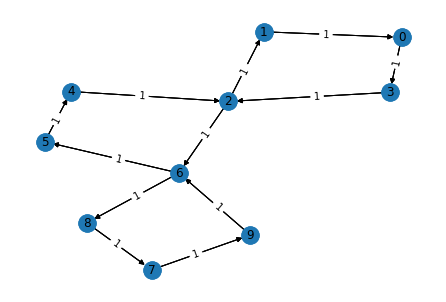

In [68]:
def eulerian_cycle(G,start=None):
    '''Given a directed graph, find the Eulerian cycle. Returns None if no Eulerian Cycle.'''
    G = copy.deepcopy(G)
    # Check if conditions are met to have an Euler Circuit in this graph using networkx features
    for i in G.in_degree:
        if i[1] != G.out_degree(i[0]):
            return None
    start = list(G.nodes)[0] if start is None else start
    cycle = []
    stack = [start]
    # Finding the Euler Circuit (Using Hierholzer’s Algorithm)
    while len(stack) > 0:
        current = stack[-1]
        neighbors = list(G.neighbors(current))
        if len(neighbors) > 0:
            next_node = neighbors[0]
            stack.append(next_node)
            G.remove_edge(current,next_node)
        else:
            cycle.insert(0,stack.pop())
    return cycle
    
G = nx.MultiDiGraph()
G.add_edge(0,3)
G.add_edge(1,0)
G.add_edge(2,1)
G.add_edge(2,6)
G.add_edge(3,2)
G.add_edge(4,2)
G.add_edge(5,4)
G.add_edge(6,5)
G.add_edge(6,8)
G.add_edge(7,9)
G.add_edge(8,7)
G.add_edge(9,6)

show(G)
print(eulerian_cycle(G))


print(eulerian_cycle(G,start=6)) # Should also result in a shifted but equivalent answer. 
# If your code isn't working, please carefully read the section on the ant moving around the graph and getting stuck :)

## Eulerian path
Consider the following graph that does not contain a Eulerian cycle.

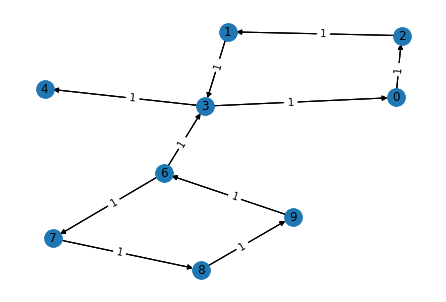

In [69]:
G2 = nx.MultiDiGraph()
G2.add_edge(0,2);G2.add_edge(1,3);G2.add_edge(2,1);G2.add_edge(3,0);G2.add_edge(3,4);G2.add_edge(6,3);G2.add_edge(6,7);G2.add_edge(7,8);G2.add_edge(8,9);G2.add_edge(9,6)
show(G2)

Consider the following function that finds the in and out degree of every node.

In [70]:
def calc_in_out(G):
    '''Finds the in and out degree of every node.'''
    in_deg = {}
    out_deg = {}
    for u,v in G.edges():
        if v not in in_deg:
            in_deg[v] = 0
        if u not in out_deg:
            out_deg[u] = 0
        in_deg[v] += 1
        out_deg[u] += 1
    in_out = pd.Series(in_deg,name="in").to_frame().join(pd.Series(out_deg,name="out").to_frame(),how='outer')
    return in_out.fillna(0).astype(int)

In [71]:
calc_in_out(G2)

,in,out
0,1,1
1,1,1
2,1,1
3,2,2
4,1,0
6,1,2
7,1,1
8,1,1
9,1,1


Is there "nearly" a cycle? If so, how would you find it? What two nodes would you connect?

**Exercise 4** Given a Eulerian directed graph, find the Eulerian path.

Given: An Eulerian directed graph, in the form of a MultiDiGraph networkx object.

Return: An Eulerian path in this graph returned as a list.

Hint: Can you find the correct starting node from the output of ``in_out``?

In [91]:
def euler_check(row):
    '''Using a result from calc_in_out to find if an Euler Path exists.'''
    return row.loc['in'] - row.loc['out']

def eulerian_path(G):
    '''Given a Eulerian directed graph, find the Eulerian path. Returns None if no Eulerian Path.'''
    G = copy.deepcopy(G)
    # Check if conditions are met to have an Euler Path in this graph using calc_in_out
    in_out = calc_in_out(G)
    a,b = None,None
    for i,v in in_out.apply(euler_check, axis=1).iteritems():
        if v > 1 or v < -1:
            return None
        elif v == 1:
            if a is None:
                a = i
            else:
                return None
        elif v == -1:
            if b is None:
                b = i
            else:
                return None
    
    # Add an edge from b to a to make it possible for an Euler Cycle
    G.add_edge(a,b)

    # Find Euler Cycle in new graph
    ec = eulerian_cycle(G)

    # By removing the added edge from the Eulerian Cycle, the resulting path from b to a is a Eulerian Path
    for i,node in enumerate(ec):
        if node == a and ec[i+1] == b:
            path = ec[i+1:] + ec[1:i+1]
            return path

    return None # Just in case

eulerian_path(G2)

[6, 7, 8, 9, 6, 3, 0, 2, 1, 3, 4]

We can finally put everything together!

**Exercise 5:** Reconstruct a string from its k-mer composition.

Given: Given a list of $k$-mers patterns.

Return: A string ``text`` with $k$-mer composition equal to patterns.

In [114]:
def reconstruct(kmers):
    '''Reconstruct a string from its k-mer composition.'''
    k = len(kmers[0])
    dB = de_bruijn(kmers)
    path = eulerian_path(dB)
    text = ""
    for node in path:
        text += node[0]
    return text + path[-1][-(k-2):]
    
kmers = ["CTTA","ACCA","TACC","GGCT","GCTT","TTAC"]
reconstruct(kmers)

'GGCTTACCA'

In [12]:
# Don't forget to push!

['../tests/answers_Lab3.joblib']